# Problem 3

In [1]:
%pylab inline

import numpy as np
from scipy.io import loadmat

Populating the interactive namespace from numpy and matplotlib


In [2]:
def PCA(data, dims):
    standarized_data = (data - np.mean(data, 0))/np.std(data, 0)
    S = np.cov(standarized_data.T)
    D, V = np.linalg.eig(S)
    idx = D.argsort()[::-1]
    D, V = D[idx], V[:, idx]
    decorrelated_data = standarized_data.dot(V)/sqrt(D)
    return decorrelated_data[:, :dims], D, V

In [3]:
def reconstruct_data(reduced_data, D, V, original_data, dims):
    extended_data = np.hstack([reduced_dataset, np.zeros((reduced_dataset.shape[0], dims-reduced_dataset.shape[1]))])
    return (((extended_data*(sqrt(D))).dot(np.linalg.inv(V)) * np.std(original_data, 0)) + np.mean(original_data, 0)).astype(np.float64)

In [4]:
dataset = loadmat("Lista07Dane/ReducedImagesForTraining.mat")["images"].T

def get_face(no, dataset):
    return dataset[no]

def show_face(no, dataset):
    imshow(get_face(no, dataset).reshape((60,82)).T, cmap="gray")

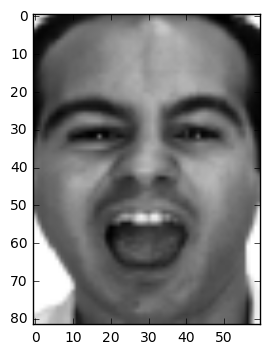

In [5]:
show_face(3, dataset)

In [6]:
dims = 50
reduced_dataset, D, V = PCA(dataset, dims)

In [7]:
reconstructed_dataset = reconstruct_data(reduced_dataset, D, V, dataset, 4920)

D:\Programy\Anaconda\lib\site-packages\ipykernel\__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


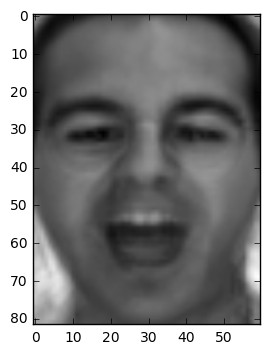

In [8]:
show_face(3, reconstructed_dataset)

D:\Programy\Anaconda\lib\site-packages\ipykernel\__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


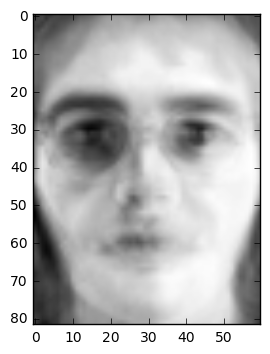

In [9]:
invV = np.linalg.inv(V)
show_face(0, invV.astype(np.float64))

D:\Programy\Anaconda\lib\site-packages\ipykernel\__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


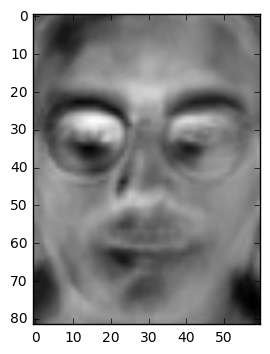

In [10]:
show_face(10, invV.astype(np.float64))

In [19]:
print "Sum of ignored eigenvalues/sum of all eigenvalues: {:.2f}%".format(100*(sum(D[-(4920-dims):])/sum(D)).astype(np.float64))

Sum of ignored eigenvalues/sum of all eigenvalues: 9.87%


D:\Programy\Anaconda\lib\site-packages\ipykernel\__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


# Problem 4

In [11]:
from scipy import stats

def kNN(k, test_point, training_points, training_labels, treshold=None):
    distances = ((training_points - test_point)**2).sum(axis=1)
    indices = argsort(distances)
    if treshold:
        best_k = [training_labels[index] for index in indices[:k] if distances[index] < treshold]
        if not best_k:
            return None
    else:
        best_k = [training_labels[index] for index in indices[:k]]
    return stats.mode(array(best_k))[0][0]

In [12]:
test_dataset = loadmat("Lista07Dane/ReducedImagesForTesting.mat")["images"].T

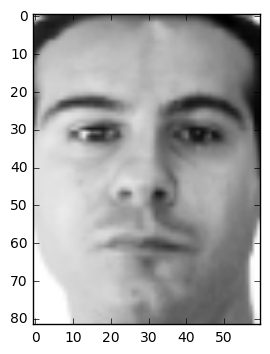

In [13]:
show_face(0, test_dataset)

In [14]:
training_labels = [i for i in range(50) for _ in range(5)]
print kNN(1, get_face(0, test_dataset), dataset, training_labels)

31


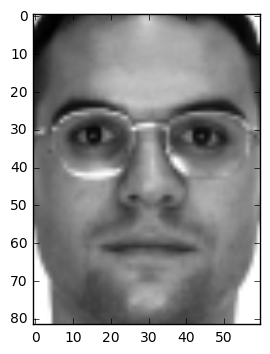

In [15]:
show_face(31*5, dataset)

In [16]:
errors = 0
total_classified = 0
for i, face in enumerate(test_dataset):
    label = kNN(1, face, dataset, training_labels)
    if label is not None:
        total_classified += 1
        if label != i/2:
            errors += 1
print "Error rate (no treshold): {:.2f}%".format(100.0*errors/total_classified)

Error rate (no treshold): 83.00%


Best treshold: 17500000
Not classified: 6
Error rate: 81.91%


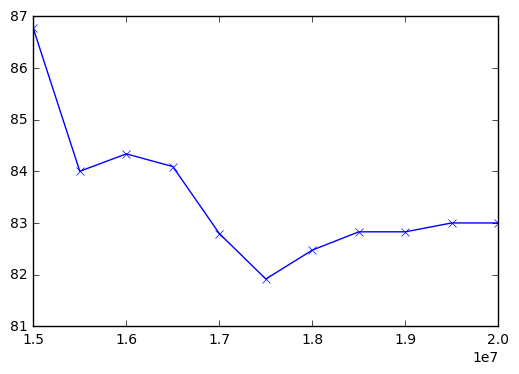

In [17]:
results = []
for treshold in range(15000000, 20000000+1, 500000):
    errors = 0
    total_classified = 0
    for i, face in enumerate(test_dataset):
        label = kNN(1, face, dataset, training_labels, treshold)
        if label is not None:
            total_classified += 1
            if label != i/2:
                errors += 1
    results.append((treshold, 100.0*errors/total_classified, total_classified))
plot([treshold for (treshold, _, _) in results], [error_rate for (_, error_rate, _) in results], marker='x')
(treshold, error_rate, total_classified) = sorted(results, key=lambda x: x[1])[0]
print "Best treshold:", treshold
print "Not classified:", len(test_dataset) - total_classified
print "Error rate: {:.2f}%".format(error_rate)

# Problem 5

In [18]:
dims = 50
reduced_dataset, D, V = PCA(dataset, dims)

In [19]:
standarized_test_dataset = (test_dataset - np.mean(test_dataset, 0))/np.std(test_dataset, 0)
reduced_test_dataset = (standarized_test_dataset.dot(V)/sqrt(D))[:, :dims]
reconstructed_test_dataset = reconstruct_data(reduced_test_dataset, D, V, test_dataset, 4920)

D:\Programy\Anaconda\lib\site-packages\ipykernel\__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


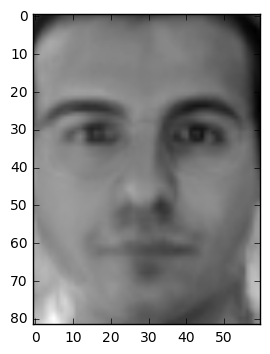

In [20]:
show_face(0, reconstructed_test_dataset)

In [21]:
print kNN(1, get_face(0, reduced_test_dataset), reduced_dataset, training_labels)

0


In [22]:
errors = 0
total_classified = 0
for i, face in enumerate(reduced_test_dataset):
    label = kNN(1, face, reduced_dataset, training_labels)
    if label is not None:
        total_classified += 1
        if label != i/2:
            errors += 1
print "Error rate (no treshold): {:.2f}%".format(100.0*errors/total_classified)

Error rate (no treshold): 1.00%


# Problem 6

In [23]:
def analyze_dims_with_knn(dims):
    errors_percentages = []
    for k in [1,3,5,7,9]:
        merged_dataset = np.vstack([dataset, test_dataset])
        merged_labels = [i for i in range(50) for _ in range(5)] + [i for i in range(50) for _ in range(2)]
        data = np.hstack([merged_dataset, np.array(merged_labels).reshape((len(merged_labels), 1))])
        
        errors = 0
        k_cross = 5
        random.shuffle(data)
        data = data.reshape((k_cross, data.shape[0]/k_cross, data.shape[1]))

        for i in range(k_cross):
            mask = np.array(range(k_cross)) != i
            test_set, training_set = data[i], data[mask].reshape(((k_cross-1)*data.shape[1], data.shape[2]))
            training_labels, test_labels = training_set[:, -1], test_set[:, -1]
            reduced_training_set, D, V = PCA(training_set[:, :-1], dims)
            standarized_test_set = (test_set - np.mean(test_set, 0))/np.std(test_set, 0)
            reduced_test_set = (standarized_test_set[:, :-1].dot(V)/sqrt(D))[:, :dims]
            for (test_data, test_label) in zip(reduced_test_set, test_labels):
                label = kNN(k, test_data, reduced_training_set, training_labels)
                if label != test_label:
                    errors += 1
        errors_percentages.append((k, errors*100.0/(k_cross*test_set.shape[0])))

    plot([k for (k, _) in errors_percentages], [error_rate for (_, error_rate) in errors_percentages], marker='x')

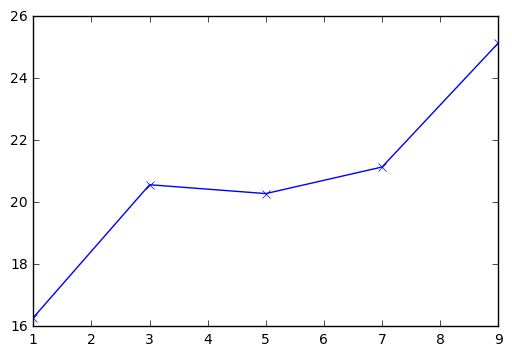

In [24]:
analyze_dims_with_knn(30)

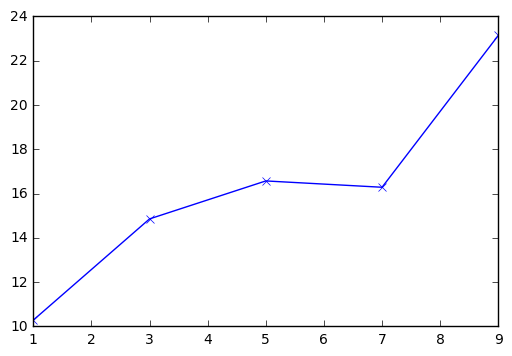

In [25]:
analyze_dims_with_knn(50)

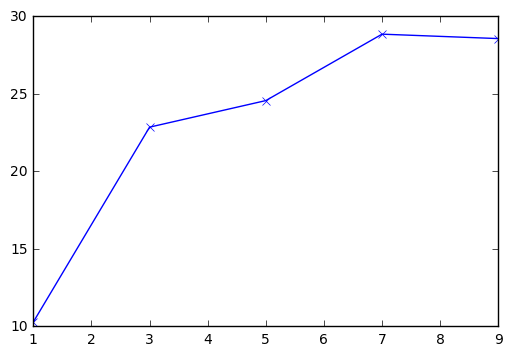

In [26]:
analyze_dims_with_knn(100)